# Multivariate Normal Distribution in Exponential Family Form

This notebook demonstrates the **Multivariate Normal distribution** implemented as an exponential family.

**Key Features:**
- Three parametrizations: Classical (μ, Σ), Natural (θ), Expectation (η)
- Sufficient statistics: t(x) = [x, xx^T]
- Supports both univariate (d=1) and multivariate (d>1) cases
- Comparison with scipy implementation
- Visualization of PDFs, CDFs, and samples


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from normix.distributions.multivariate import MultivariateNormal

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11


## 1. Creating Distributions (1D Case)

The multivariate normal distribution can be created using three different parametrizations.
Let's first look at the 1D (univariate) case:


In [2]:
# Classical parameters (μ, Σ)
mu = np.array([2.0])
sigma = np.array([[1.5]])

dist1 = MultivariateNormal.from_classical_params(mu=mu, sigma=sigma)
print(f"From classical params: {dist1}")

# Natural parameters
theta = dist1.get_natural_params()
dist2 = MultivariateNormal(d=1).from_natural_params(theta)
print(f"From natural params:   {dist2}")

# Expectation parameters
eta = dist1.get_expectation_params()
dist3 = MultivariateNormal(d=1).from_expectation_params(eta)
print(f"From expectation params: {dist3}")

print("\n✓ All three parametrizations create the same distribution!")


From classical params: MultivariateNormal(μ=2.0000, σ²=1.5000)
From natural params:   MultivariateNormal(μ=2.0000, σ²=1.5000)
From expectation params: MultivariateNormal(μ=2.0000, σ²=1.5000)

✓ All three parametrizations create the same distribution!


## 2. PDF and CDF Comparison with Scipy (1D Case)

Let's compare our implementation with scipy's normal distribution.


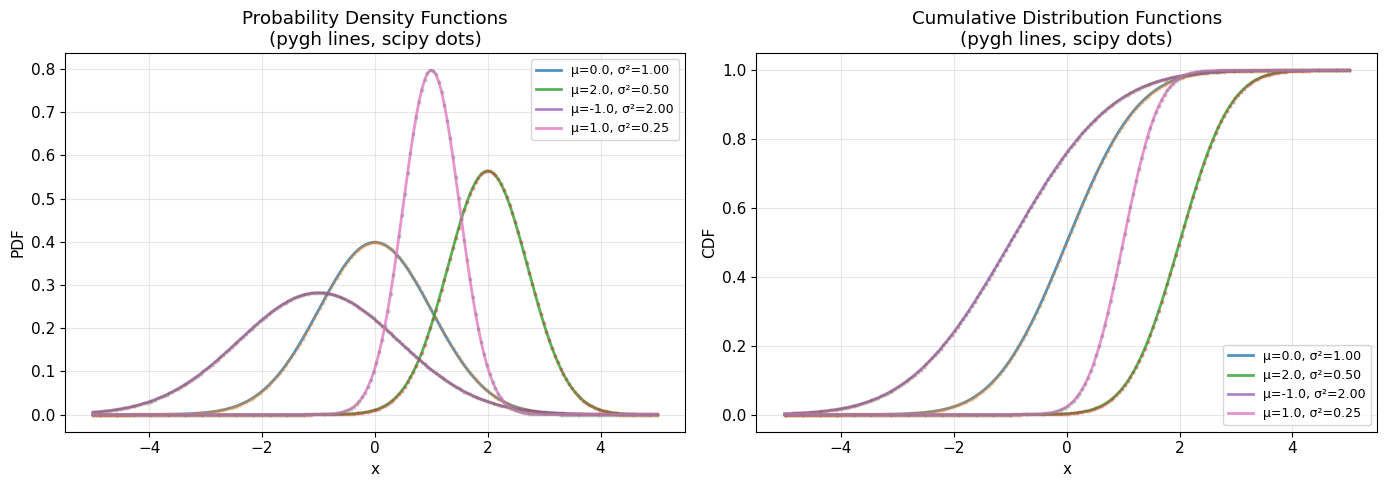

✓ normix and scipy implementations match perfectly!


In [3]:
# Test different parameter combinations
test_configs = [
    {'mu': np.array([0.0]), 'sigma': np.array([[1.0]])},
    {'mu': np.array([2.0]), 'sigma': np.array([[0.5]])},
    {'mu': np.array([-1.0]), 'sigma': np.array([[2.0]])},
    {'mu': np.array([1.0]), 'sigma': np.array([[0.25]])},
]

x = np.linspace(-5, 5, 200)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot PDFs
ax = axes[0]
for cfg in test_configs:
    mu_val = cfg['mu'][0]
    sigma_val = cfg['sigma'][0, 0]
    
    # normix distribution
    normix_dist = MultivariateNormal.from_classical_params(**cfg)
    normix_pdf = normix_dist.pdf(x.reshape(-1, 1))
    
    # scipy distribution
    scipy_dist = stats.norm(loc=mu_val, scale=np.sqrt(sigma_val))
    scipy_pdf = scipy_dist.pdf(x)
    
    # Plot both
    ax.plot(x, normix_pdf, '-', linewidth=2, 
            label=f'μ={mu_val:.1f}, σ²={sigma_val:.2f}', alpha=0.8)
    ax.plot(x, scipy_pdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('Probability Density Functions\n(normix lines, scipy dots)')
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)

# Plot CDFs
ax = axes[1]
for cfg in test_configs:
    mu_val = cfg['mu'][0]
    sigma_val = cfg['sigma'][0, 0]
    
    # normix distribution
    normix_dist = MultivariateNormal.from_classical_params(**cfg)
    normix_cdf = normix_dist.cdf(x)
    
    # scipy distribution
    scipy_dist = stats.norm(loc=mu_val, scale=np.sqrt(sigma_val))
    scipy_cdf = scipy_dist.cdf(x)
    
    # Plot both
    ax.plot(x, normix_cdf, '-', linewidth=2, 
            label=f'μ={mu_val:.1f}, σ²={sigma_val:.2f}', alpha=0.8)
    ax.plot(x, scipy_cdf, 'o', markersize=2, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Cumulative Distribution Functions\n(normix lines, scipy dots)')
ax.legend(loc='lower right', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ normix and scipy implementations match perfectly!")


## 3. Random Sampling and Histograms (1D Case)

Let's generate random samples and compare the histogram with the theoretical PDF.


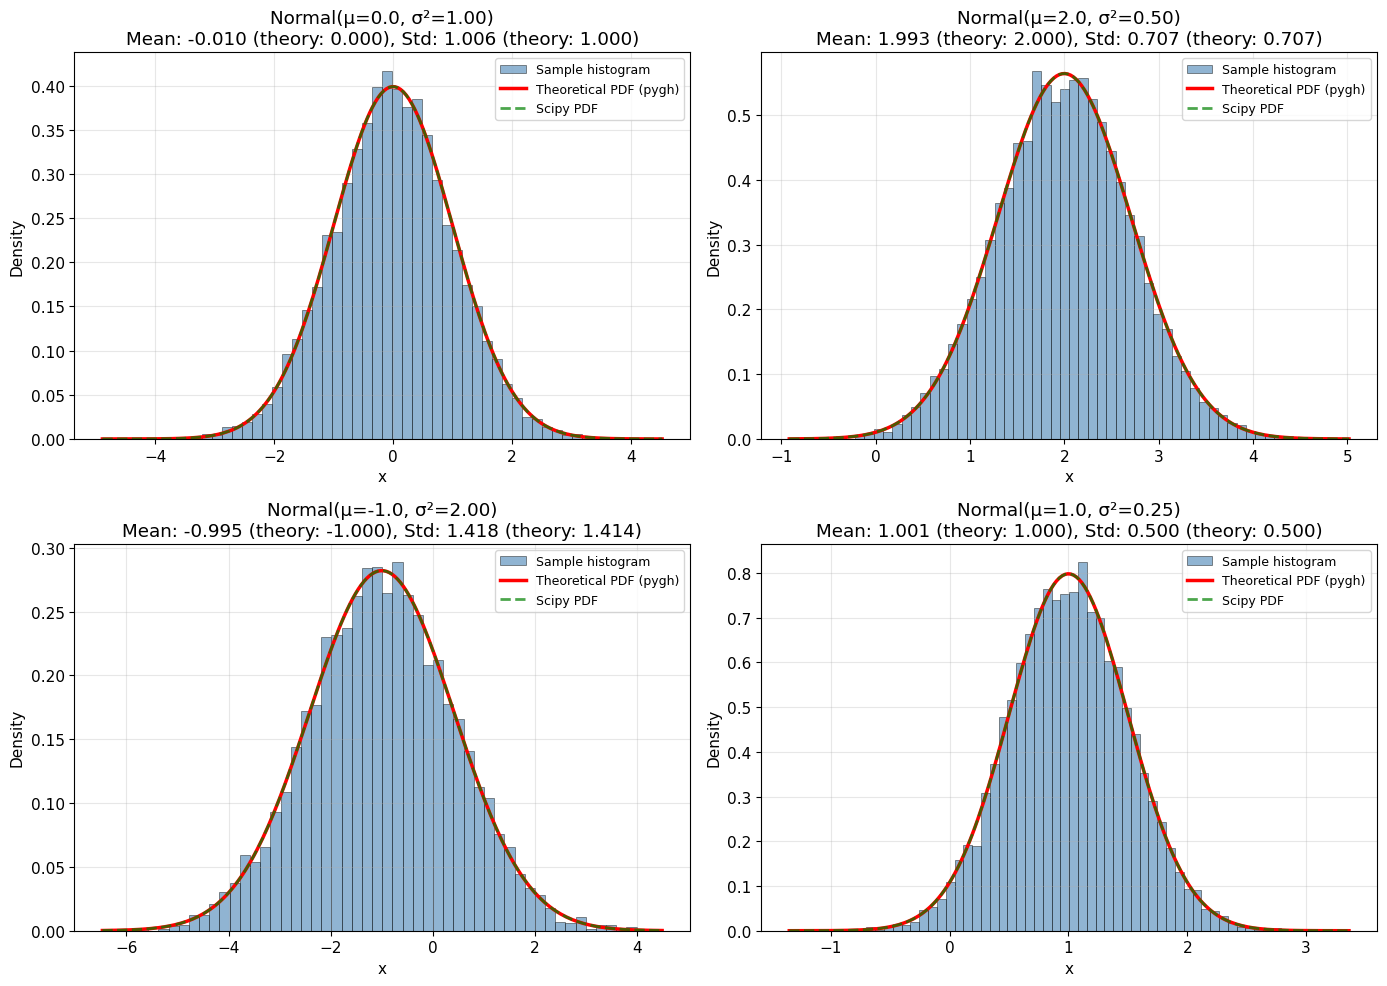

✓ Histograms match theoretical PDFs closely!


In [4]:
# Parameters for different distributions
test_configs = [
    {'mu': np.array([0.0]), 'sigma': np.array([[1.0]]), 'n_samples': 10000},
    {'mu': np.array([2.0]), 'sigma': np.array([[0.5]]), 'n_samples': 10000},
    {'mu': np.array([-1.0]), 'sigma': np.array([[2.0]]), 'n_samples': 10000},
    {'mu': np.array([1.0]), 'sigma': np.array([[0.25]]), 'n_samples': 10000},
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, config in enumerate(test_configs):
    mu = config['mu']
    sigma = config['sigma']
    n_samples = config['n_samples']
    
    dist = MultivariateNormal.from_classical_params(mu=mu, sigma=sigma)
    samples = dist.rvs(size=n_samples, random_state=42 + idx)
    samples_flat = samples.flatten()
    
    x_plot = np.linspace(samples_flat.min() - 0.5, samples_flat.max() + 0.5, 200)
    pdf_theory = dist.pdf(x_plot.reshape(-1, 1))
    
    ax = axes[idx]
    ax.hist(samples_flat, bins=50, density=True, alpha=0.6, color='steelblue', 
            edgecolor='black', linewidth=0.5, label='Sample histogram')
    ax.plot(x_plot, pdf_theory, 'r-', linewidth=2.5, label='Theoretical PDF (normix)')
    
    scipy_dist = stats.norm(loc=mu[0], scale=np.sqrt(sigma[0, 0]))
    ax.plot(x_plot, scipy_dist.pdf(x_plot), 'g--', linewidth=2, label='Scipy PDF', alpha=0.7)
    
    sample_mean = np.mean(samples_flat)
    theory_mean = dist.mean()[0]
    sample_std = np.std(samples_flat)
    theory_std = np.sqrt(dist.var()[0])
    
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(f'Normal(μ={mu[0]:.1f}, σ²={sigma[0,0]:.2f})\n'
                f'Mean: {sample_mean:.3f} (theory: {theory_mean:.3f}), '
                f'Std: {sample_std:.3f} (theory: {theory_std:.3f})')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Histograms match theoretical PDFs closely!")


## 4. Two-Dimensional Case: Scatter Plot vs PDF Contour

Now let's visualize the 2D multivariate normal distribution.


In [5]:
# Create 2D distribution with correlation
mu_2d = np.array([1.0, 2.0])
sigma_2d = np.array([[1.0, 0.6], 
                     [0.6, 1.5]])

dist_2d = MultivariateNormal.from_classical_params(mu=mu_2d, sigma=sigma_2d)
print(f"2D Distribution: {dist_2d}")
print(f"Mean: {dist_2d.mean()}")
print(f"Covariance:\n{dist_2d.cov()}")


2D Distribution: MultivariateNormal(μ=[1.0000, 2.0000], d=2)
Mean: [1. 2.]
Covariance:
[[1.  0.6]
 [0.6 1.5]]


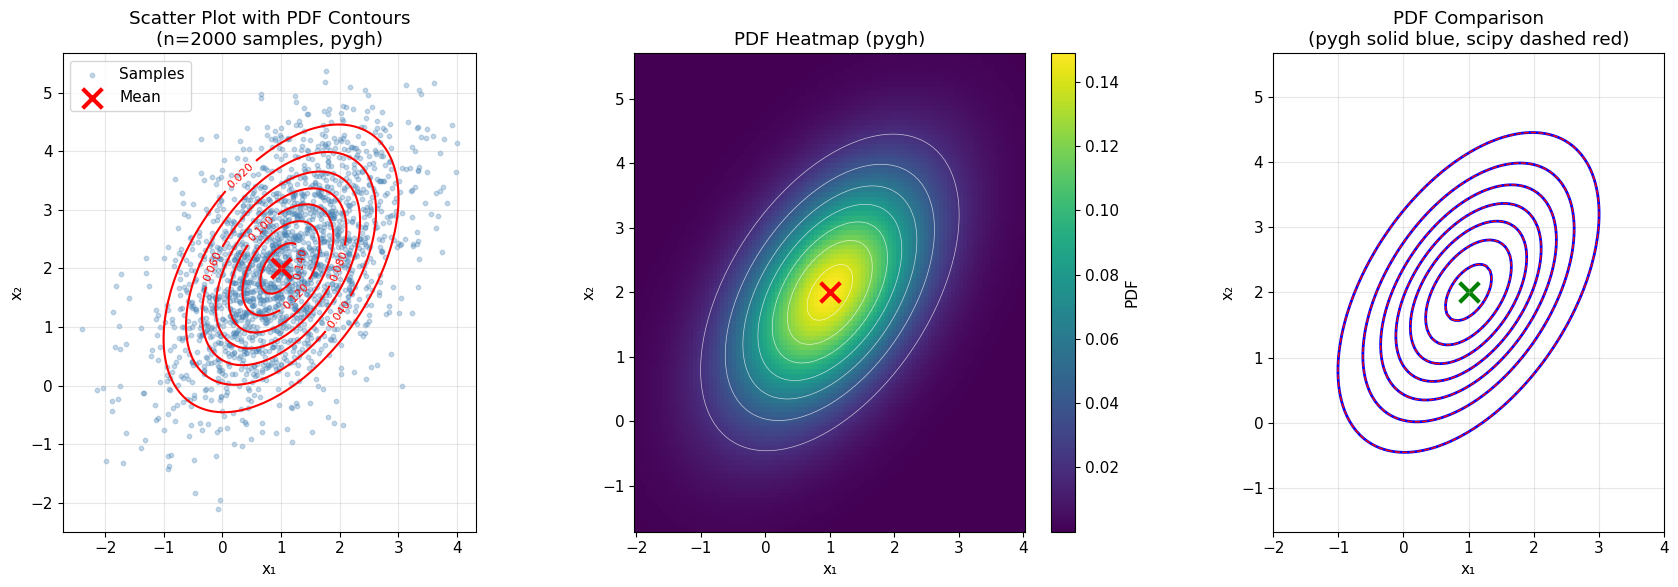


✓ Maximum PDF difference between normix and scipy: 8.33e-17
✓ The contours overlap perfectly!


In [6]:
# Generate samples
n_samples = 2000
samples_2d = dist_2d.rvs(size=n_samples, random_state=42)

# Create grid for PDF contour
x1_range = np.linspace(mu_2d[0] - 3*np.sqrt(sigma_2d[0,0]), 
                       mu_2d[0] + 3*np.sqrt(sigma_2d[0,0]), 100)
x2_range = np.linspace(mu_2d[1] - 3*np.sqrt(sigma_2d[1,1]), 
                       mu_2d[1] + 3*np.sqrt(sigma_2d[1,1]), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])

# Compute PDF on grid
pdf_values = dist_2d.pdf(grid_points).reshape(X1.shape)
scipy_2d = stats.multivariate_normal(mean=mu_2d, cov=sigma_2d)
scipy_pdf = scipy_2d.pdf(grid_points).reshape(X1.shape)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot with contours
ax = axes[0]
ax.scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.3, s=10, c='steelblue', label='Samples')
contour = ax.contour(X1, X2, pdf_values, levels=8, colors='red', linewidths=1.5)
ax.clabel(contour, inline=True, fontsize=8, fmt='%.3f')
ax.scatter([mu_2d[0]], [mu_2d[1]], color='red', marker='x', s=200, linewidths=3, label='Mean')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Scatter Plot with PDF Contours\n(n={n_samples} samples, normix)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# PDF heatmap
ax = axes[1]
im = ax.pcolormesh(X1, X2, pdf_values, shading='auto', cmap='viridis')
ax.contour(X1, X2, pdf_values, levels=8, colors='white', linewidths=0.5, alpha=0.7)
ax.scatter([mu_2d[0]], [mu_2d[1]], color='red', marker='x', s=200, linewidths=3)
plt.colorbar(im, ax=ax, label='PDF')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('PDF Heatmap (normix)')
ax.set_aspect('equal')

# PDF comparison
ax = axes[2]
ax.contour(X1, X2, pdf_values, levels=8, colors='blue', linewidths=2, linestyles='-')
ax.contour(X1, X2, scipy_pdf, levels=8, colors='red', linewidths=1, linestyles='--')
ax.scatter([mu_2d[0]], [mu_2d[1]], color='green', marker='x', s=200, linewidths=3)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('PDF Comparison\n(normix solid blue, scipy dashed red)')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

max_diff = np.max(np.abs(pdf_values - scipy_pdf))
print(f"\n✓ Maximum PDF difference between normix and scipy: {max_diff:.2e}")
print("✓ The contours overlap perfectly!")


## 5. Fitting to Data

Demonstrate maximum likelihood estimation by fitting to 2D data.


Fitting 2000 samples

True mean: [ 1.5 -0.5]
Fitted mean: [ 1.48221576 -0.52346001]

True covariance:
 [[2.  0.8]
 [0.8 1.5]]
Fitted covariance:
 [[2.04516531 0.79072597]
 [0.79072597 1.49508009]]


/tmp/ipykernel_935885/2642214309.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X1, X2, true_pdf, levels=6, colors='green', linewidths=2, linestyles='--', label='True')
/tmp/ipykernel_935885/2642214309.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X1, X2, fitted_pdf, levels=6, colors='red', linewidths=2, label='Fitted')


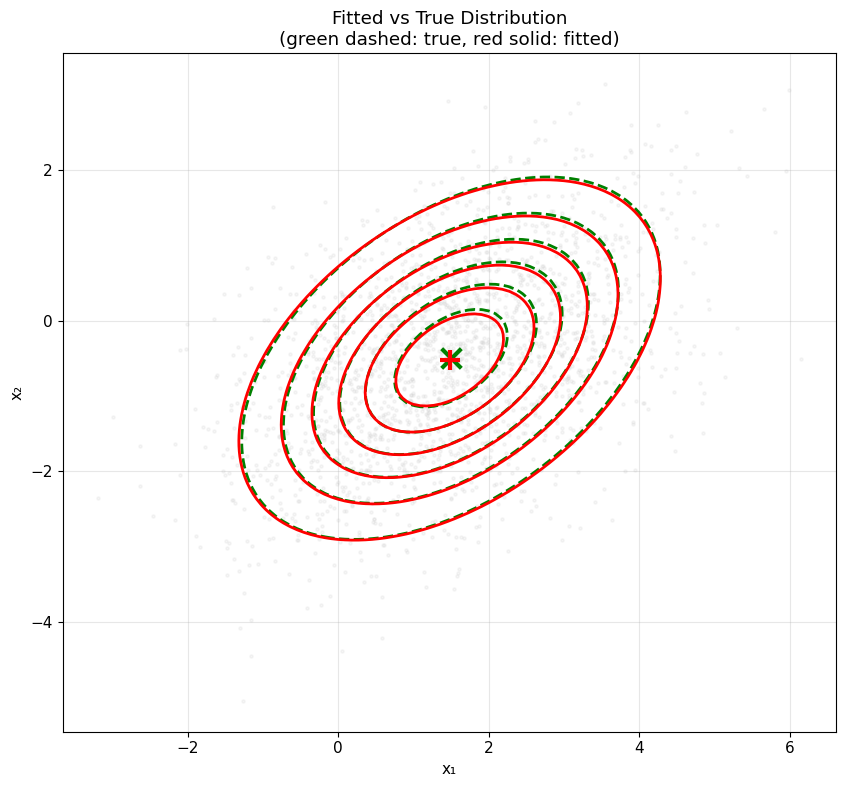


✓ MLE successfully recovers the true parameters!


In [7]:
# Generate data with known parameters
true_mu = np.array([1.5, -0.5])
true_sigma = np.array([[2.0, 0.8], [0.8, 1.5]])
n_data = 2000

true_dist = MultivariateNormal.from_classical_params(mu=true_mu, sigma=true_sigma)
data = true_dist.rvs(size=n_data, random_state=123)

# Fit distribution
fitted_dist = MultivariateNormal(d=2).fit(data)
fitted_params = fitted_dist.get_classical_params()

print(f"Fitting {n_data} samples\n")
print("True mean:", true_mu)
print("Fitted mean:", fitted_params['mu'])
print("\nTrue covariance:\n", true_sigma)
print("Fitted covariance:\n", fitted_params['sigma'])

# Visualize
x1_range = np.linspace(-3, 6, 100)
x2_range = np.linspace(-4, 3, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
grid = np.column_stack([X1.ravel(), X2.ravel()])

true_pdf = true_dist.pdf(grid).reshape(X1.shape)
fitted_pdf = fitted_dist.pdf(grid).reshape(X1.shape)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data[:, 0], data[:, 1], alpha=0.2, s=5, c='lightgray', label='Data')
ax.contour(X1, X2, true_pdf, levels=6, colors='green', linewidths=2, linestyles='--', label='True')
ax.contour(X1, X2, fitted_pdf, levels=6, colors='red', linewidths=2, label='Fitted')
ax.scatter([true_mu[0]], [true_mu[1]], color='green', marker='x', s=200, linewidths=3)
ax.scatter([fitted_params['mu'][0]], [fitted_params['mu'][1]], color='red', marker='+', s=200, linewidths=3)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Fitted vs True Distribution\n(green dashed: true, red solid: fitted)')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

print("\n✓ MLE successfully recovers the true parameters!")
